<a href="https://colab.research.google.com/github/najimamuhammad/Programs/blob/main/CNNnmist1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image


from keras.datasets import mnist

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
(x_train,y_train),(x_test,y_test)=dataset

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [9]:
x_train.shape

(60000, 28, 28, 1)

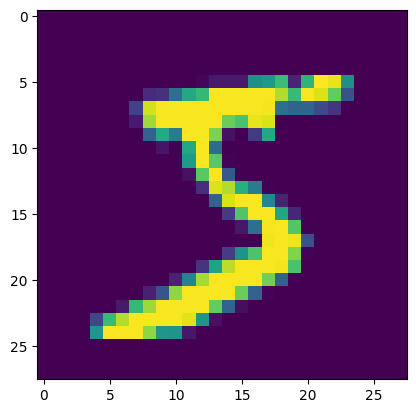

In [7]:
plt.imshow(x_train[0])



In [8]:
x_train=keras.utils.normalize(x_train,axis=1)
x_test=keras.utils.normalize(x_test,axis=1)

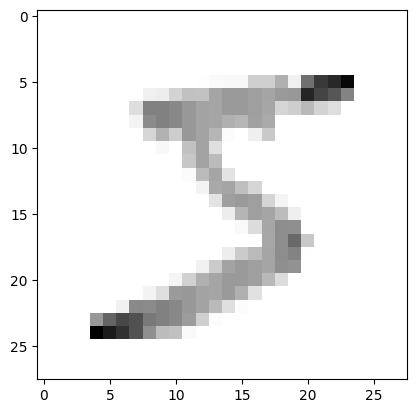

In [9]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [12]:
print(x_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [37]:
model=Sequential()


model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size = 3,dilation_rate=(2,2), activation='relu'))
model.add(Conv2D(128, kernel_size = 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(20, kernel_size = 1, activation='relu'))
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(Conv2D(128, kernel_size = 3, activation='relu'))
model.add(Conv2D(10, kernel_size = 5))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.summary(0)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 10, 10, 20)          │           2,580 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 8, 8, 32)            │           5,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 6, 6, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 0, 0, 10)            │          32,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 0)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 0)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,406 (880.49 KB)

 Trainable params: 225,406 (880.49 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8994 - loss: 0.3109
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9856 - loss: 0.0468
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9902 - loss: 0.0338


In [14]:
val_loss,val_acc=model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9872 - loss: 0.0411


In [30]:
p=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [35]:
print(np.argmax(p[111]))

7


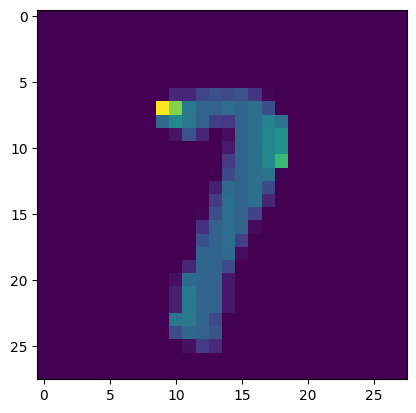

In [36]:
plt.imshow(x_test[111])

In [15]:
print(val_acc,val_loss)

0.9889000058174133 0.03429950773715973


In [16]:
model.save('minst_new.keras')

In [17]:
new_model=keras.models.load_model('minst_new.keras')

In [18]:
pred=new_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [19]:
print(np.argmax(pred[0]))

7


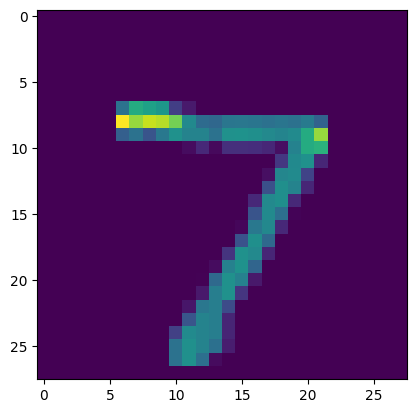

In [20]:
plt.imshow(x_test[0])

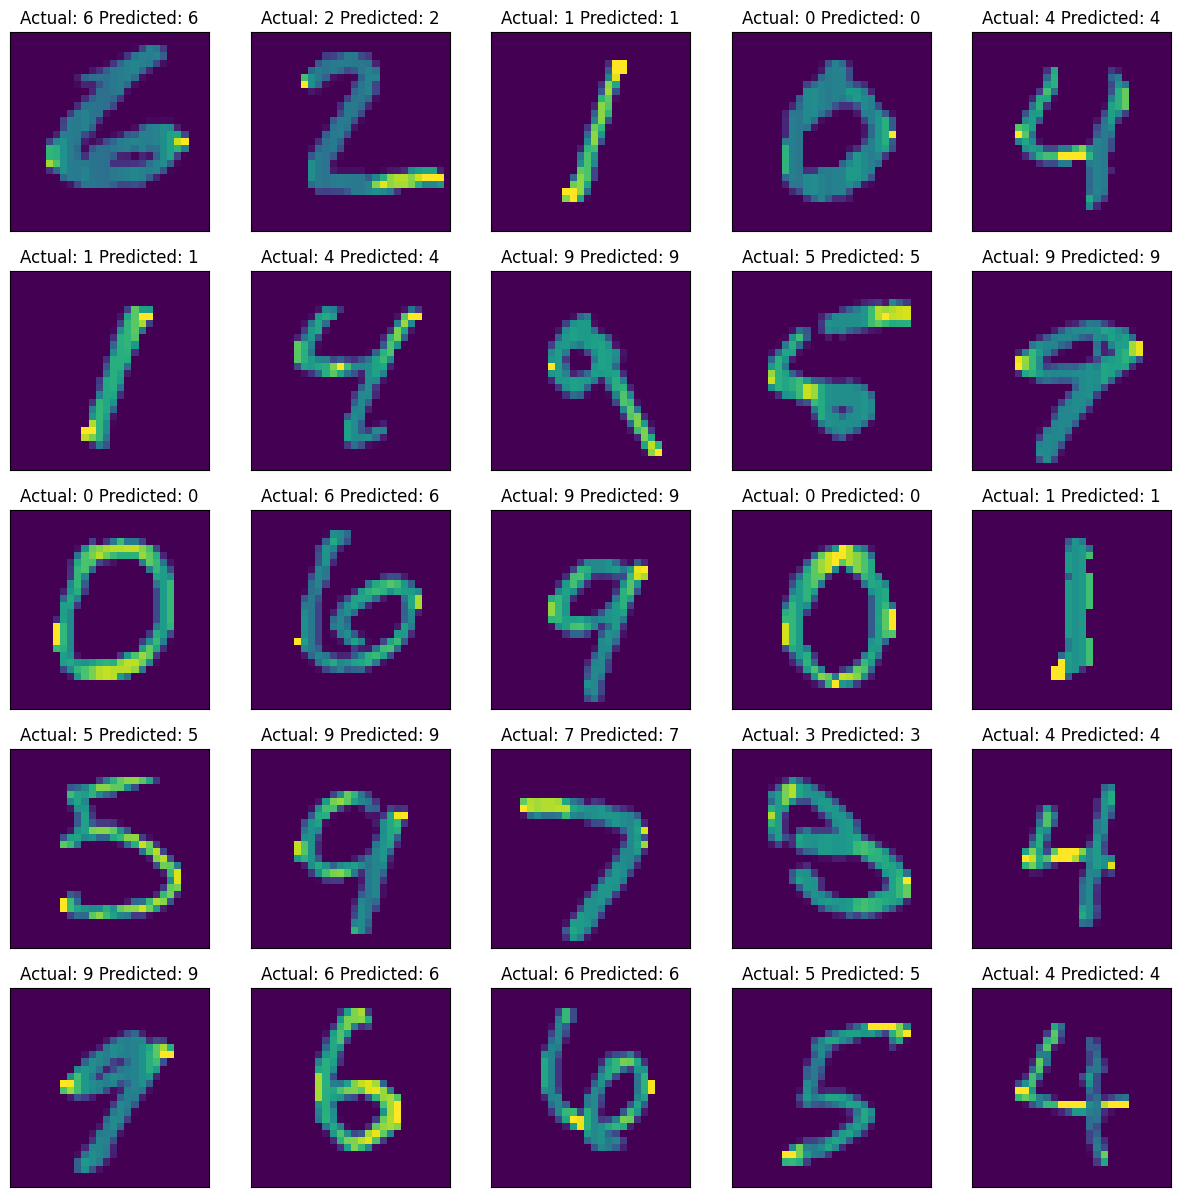

In [29]:
image_index=[]
for i in range(1,x_test.shape[0]):
  if np.array(pred[i]).argmax()==y_test[i]:
    image_index.append(i)
def image_reconstruct(x):
  x-=x.mean()
  x/=x.std()+ 1e-5
  x*=0.1

  x+=0.5
  x=np.clip(x,0,1)

  x*=255
  x=np.clip(x,0,255).astype('uint8')

  return x
img_actual=[]
img_actual_value=[]
img_pred_value=[]
for i in range(0,26):
  img_req=np.array(x_test[image_index[i-1]]).reshape((28,28))
  #print (img_req)
  img_req=image_reconstruct(img_req).reshape((28,28))
  img_actual.append(img_req)
  img_actual_value.append(y_test[image_index[i-1]])
  img_pred_value.append(np.argmax(pred[image_index[i-1]]))
row=5
col=5
fig=plt.figure(figsize=(15,15))
for i in range(0,25):
  fig.add_subplot(row,col,i+1)
  #print(i,'hi')
  plt.imshow(img_actual[i])
  plt.title('Actual: '+str(img_actual_value[i])+' Predicted: '+str(img_pred_value[i]))
  plt.xticks([])
  plt.yticks([])
#plt.imshow(x_test[image_index])
plt.show()